# Preprocessing

In [5]:
# import libraries
import pandas as pd 

import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer


from sklearn.model_selection import train_test_split
from sklearn.utils import resample

from wordcloud import WordCloud


from sklearn.feature_extraction.text import TfidfVectorizer


import pickle
import string


In [2]:
# load reviews dataframe if necessary
reviews = pd.read_pickle('C:/Users/frede/.spyder-py3/py dir/Capstone/resturantreviews') 

remove 3 stars, since it can contain both positve and negetive sentiment goal is to define positive and negetive sentimnet

In [3]:
reviews=reviews[reviews['review_stars']!=3] #remove 3 stars
reviews['review_stars']= reviews['review_stars']>3

In [6]:
#define preprocessing applyed to text
lemmatizer = WordNetLemmatizer() 
stop_words=[word.translate(str.maketrans(' ', ' ', string.punctuation)) for word in stopwords.words('english')]
def preprocess(text):
    #returns tokenize text to words and stemming words
    text=text.translate(str.maketrans(' ', ' ', string.punctuation))#remove all puncuation
    text=text.lower()#lower case
    return [lemmatizer.lemmatize(word) for word in text.split() if not word.lower() in stop_words and not word.isdigit()]

In [7]:
#apply preprocess to text
X=reviews['text'].apply(preprocess)

In [8]:
#split into train and test set
y=reviews.review_stars
xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [9]:
# treat class imbalance
Train = pd.concat([xTrain, yTrain], axis=1)
Positive=Train[Train.review_stars==True]
Negetive=Train[Train.review_stars==False]
Trainresampled=resample(Negetive,replace=True,n_samples=len(Positive),random_state=0)
Train= pd.concat([Positive, Trainresampled])
Test = pd.concat([xTest, yTest], axis=1)


In [10]:
processedtext=reviews
processedtext['text']=X

In [11]:
processedtext.to_pickle('processedtext')

In [12]:
Train.to_pickle('Train')
Test.to_pickle('Test')

In [10]:
# create a list of words appearing in positive reviews
wordlistp = []
for sublist in X[reviews['review_stars']]:
    for item in sublist:
        wordlistp.append(item)

In [11]:
# create a list of words appearing in negetive reviews
wordlistn = []
for sublist in X[reviews['review_stars']==False]:
    for item in sublist:
        wordlistn.append(item)

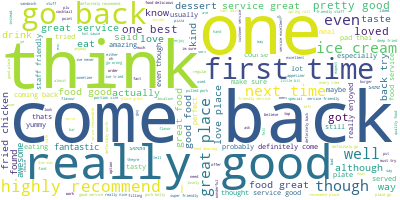

In [14]:
# Word cloud of positive reviews
# Create a WordCloud object
long_string = ','.join(wordlistp)
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')# Generate a word cloud
wordcloud.generate(long_string)# Visualize the word cloud
wordcloud.to_image()

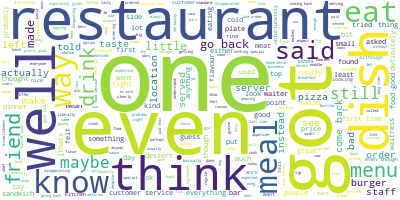

In [15]:
# Word cloud of negetivereviews
long_string = ','.join(wordlistn)
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')# Generate a word cloud
wordcloud.generate(long_string)# Visualize the word cloud
wordcloud.to_image()

In [13]:

def dummy(input):
    #dummy function that does nothing, to be passed as preprocessor argument and tokenizer argument in countvectorizer
    # since text is already preprocessed and tokenized
    return input

In [28]:
#vectorize using only unigrams
Tfidfvector=TfidfVectorizer(tokenizer=dummy,preprocessor=dummy,min_df=0.01, max_features=500)
Tfidfvector.fit(Train['text'])
TrainTfidf=Tfidfvector.transform(Train['text'])
TestTfidf=Tfidfvector.transform(Test['text'])


C:\Users\frede\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


In [29]:
#vectorize using bigrams and unigrams
Tfidfvector2=TfidfVectorizer(ngram_range=(1, 2),tokenizer=dummy,preprocessor=dummy,min_df=0.01, max_features=500)
Tfidfvector2.fit(Train['text'])
TrainTfidf2=Tfidfvector2.transform(Train['text'])
TestTfidf2=Tfidfvector2.transform(Test['text'])


C:\Users\frede\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


In [30]:
#vectorize using only bigrams
Tfidfvector3=TfidfVectorizer(ngram_range=(2, 2),tokenizer=dummy,preprocessor=dummy,min_df=0.01, max_features=500)
Tfidfvector3.fit(Train['text'])
TrainTfidf3=Tfidfvector3.transform(Train['text'])
TestTfidf3=Tfidfvector3.transform(Test['text'])


C:\Users\frede\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


In [31]:
# save for later use
pickle.dump(Tfidfvector, open("Tfidfvector.pickle", "wb"))
pickle.dump(Tfidfvector2, open("Tfidfvector2.pickle", "wb"))
pickle.dump(Tfidfvector3, open("Tfidfvector3.pickle", "wb"))

In [32]:
pickle.dump(TrainTfidf, open("TrainTfidf.pickle", "wb"))
pickle.dump(TrainTfidf2, open("TrainTfidf2.pickle", "wb"))
pickle.dump(TrainTfidf3, open("TrainTfidf3.pickle", "wb"))

In [33]:
pickle.dump(TestTfidf, open("TestTfidf.pickle", "wb"))
pickle.dump(TestTfidf2, open("TestTfidf2.pickle", "wb"))
pickle.dump(TestTfidf3, open("TestTfidf3.pickle", "wb"))